<a href="https://colab.research.google.com/github/Dowgue/Praticas_Python/blob/main/Resolu%C3%A7oes_de_Exercicios/primeiro_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***(Grupo 3)***

Douglas Araujo Gomes 

Matheus Rebello do Nascimento



# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega: 21/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20º \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



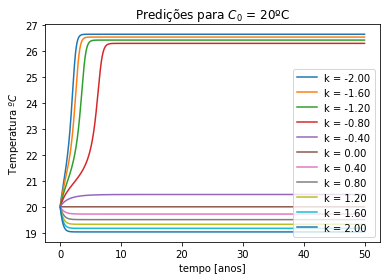

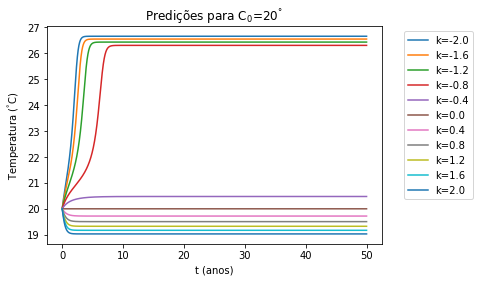

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def funcao_temperatura(t,C,a):
    '''
    Função que abriga a EDO e a devolve para a função de integração numérica
    '''
    f = (1/10)*(C-20)*(22-C)*(C-26)-a 
    return f

def inte_numerica(C0,a):
    '''
    Esta função resolve a EDO de primeira ordem numericamente com base no método de Runge-Kutta.
    Para isso, ela recebe a temperatura inicial C0 e o a que armazena o valor de k passado pelo loop da função graficando().
    Esta função em seu funcionamento invoca a funcao_temperatura(t,C[i],a) passando o tempo em analise e calculando os valores de temperatura solução da EDO os alocando em um vetor.
    '''
    C = []
    h = t[1]-t[0]
    C.append(C0) #temperatura inicial 20 graus
    for i in range(len(t)-1): 
      a1 = funcao_temperatura(t,C[i],a)
      a2 = funcao_temperatura(t+h/2,C[i]+(a1*h)/2,a)
      a3 = funcao_temperatura(t+h/2,C[i]+(a2*h)/2,a)
      a4 = funcao_temperatura(t+h,C[i]+a3*h,a)
      kn = (h/6)*(a1+2*a2+2*a3+a4)
      C.append(C[i]+kn)
    listas_temperatura[a] = C

def graficando(C0,k):
    '''
    Com esta função os gráficos são gerados para diferentes valores de k.
    Para isso ela necessita receber um valor de temperatura inicial(C0) e um vetor com os valores de k.
    Esta função em seu funcionamento invoca a inte_numerica(C0,k) passando a temperatura inicial e os valores de k para a variável a.
    '''
    for a in k:
      inte_numerica(C0,a) #relacionar automaticamente o h com o len(t) que aí fica generalizável     
      plt.plot(t,listas_temperatura[a], label='k={}'.format(round(a,2)))
    plt.title('Predições para C$_0$={}$^\degree$'.format(C0))
    plt.xlabel("t (anos)")
    plt.ylabel("Temperatura ($^\degree$C)")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
    plt.show()  
    
listas_temperatura = {}
t = []
t = np.arange(0, 50.01, 0.01) #Range temporal da função analisada
k = [-2.00, -1.60, -1.20, -0.80, -0.40, 0.00, 0.40, 0.80, 1.20, 1.60, 2.00] #valores de k  

graficando(20,k)

## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_", isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico $T_{fin}$ vs. $k$ é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



In [3]:
%%writefile predicao_temperatura_mod.py
import matplotlib.pyplot as plt
import numpy as np

def funcao_temperatura(t,C,k):
    '''
    Função que abriga a EDO e a devolve para a função de integração numérica
    '''
    f = (1/10)*(C-20)*(22-C)*(C-26)-k 
    return f

def inte_numerica(temperatura_inicial,k,t):
    '''
    Esta função resolve a EDO de primeira ordem numericamente com base no método de Runge-Kutta.
    Para isso, ela recebe a temperatura inicial C0 e o vetor com os valores de k e o vetor de tempo t.
    Esta função em seu funcionamento invoca a funcao_temperatura(t,C[i],k) passando o tempo em analise, o valor calculado de temperatura os passando para um vetor e também passa o a da variável k como k_value.
    '''   
    listas_temperatura = {}
    for k_value in k:
      C = []
      h = t[1]-t[0]
      C.append(temperatura_inicial) #temperatura inicial 20 graus
      for i in range(len(t)-1): 
        a1 = funcao_temperatura(t,C[i],k_value)
        a2 = funcao_temperatura(t+h/2,C[i]+(a1*h)/2,k_value)
        a3 = funcao_temperatura(t+h/2,C[i]+(a2*h)/2,k_value)
        a4 = funcao_temperatura(t+h,C[i]+a3*h,k_value)
        kn = (h/6)*(a1+2*a2+2*a3+a4)
        C.append(C[i]+kn)
      listas_temperatura[k_value] = C
    return listas_temperatura 

def graficando_solucao_edo(temperatura_inicial,k,t):
    '''
    Com esta função os gráficos da solução da EDO são gerados para diferentes valores de k e diferentes temperaturas iniciais.
    Para isso ela recebe um vetor com os valores das temperaturas iniciais, o vetor com valores de k e o vetor de tempo como argumento.
    '''
    for temp in temperatura_inicial: 
        listas_temperatura = inte_numerica(temp,k,t)
        for k_value in k: 
            plt.plot(t,listas_temperatura[k_value], label='k={}'.format(round(k_value,2)))
        plt.title('Predições para C$_0$={}$^\degree$C'.format(temp))
        plt.xlabel("t (anos)")
        plt.ylabel("Temperatura ($^\degree$C)")
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
        plt.show()

def graficando_diagrama_bifurcacao(t, lista_Tfinal, lista_k_do_Tfinal):
    '''
    Realiza gráfico do diagrama de bifurcação recebendo as variáveis contidas dentro da função calculo_Tfinal() como argumento. 
    '''
    for temp in lista_k_do_Tfinal:
        plt.scatter(lista_k_do_Tfinal[temp],lista_Tfinal[temp],cmap="rainbow",label='{} $\degree C$'.format(temp))
    plt.title('Diagrama de bifurcação')
    plt.xlabel("k ($^\degree C^3/s$)")
    plt.ylabel("Temperatura ($^\degree$C)")
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
    plt.show() 

def calculo_Tfinal(temperatura_inicial,t, k, resultado_tfinal =False):
    '''
    Calcula Tfinal de cada solução da EDO e cria um vetor com este valor e o tempo que leva para chegar a esse valor assintótico, invocando a função graficando_diagrama_bifurcacao().
    Para utilizar essa função deve ser passado a ela o vetor com as temperaturas inicias, o vetor com valores de tempo, o vetor com os valores de k.
    Deve se ressaltar que há um argumento default que é para imprimir em tela o valor de Tfinal com o seu devido tempo para chegar ao valor assíntótico. SE nada for declarado nada será impresso em tela.
    Para imprimir os valore de Tfinal com o seu tempo associado adicionar o argumento adicional a função "resultado_tfinal = True".
    '''
    lista_Tfinal = {}
    lista_k_do_Tfinal = {}
    lista_tempo_do_Tfinal = {}
    for temp in temperatura_inicial:
        listas_temperatura = inte_numerica(temp,k,t)
        Tfinal = []
        k_do_Tfinal = []
        tempo_do_Tfinal = []
        for k_value in listas_temperatura:  
            for i in range(len(t)-1):
                if abs((round(listas_temperatura[k_value][i+1],4)-round(listas_temperatura[k_value][i],4))) < 0.0001: #A diferença entre as temperaturas nula da a Tfinal
                  Tfinal.append(listas_temperatura[k_value][i])
                  k_do_Tfinal.append(k_value)
                  tempo_do_Tfinal.append(t[i]) 
                  if resultado_tfinal ==  True:
                     print('Para a temperatura inicial {} graus C a temperatura final é {} graus C para o valor de k {} graus C^3 e leva um tempo {} anos para atingi-lo'.format(temp,round(listas_temperatura[k_value][i],4),round(k_value,4),round(t[i],4)))
                  break
        lista_Tfinal[temp] = Tfinal
        lista_k_do_Tfinal[temp] = k_do_Tfinal
        lista_tempo_do_Tfinal[temp] = tempo_do_Tfinal   
    graficando_diagrama_bifurcacao(t, lista_Tfinal, lista_k_do_Tfinal)

Overwriting predicao_temperatura_mod.py


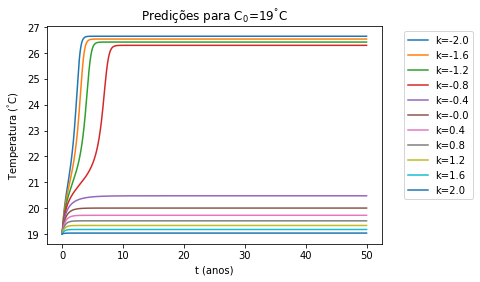

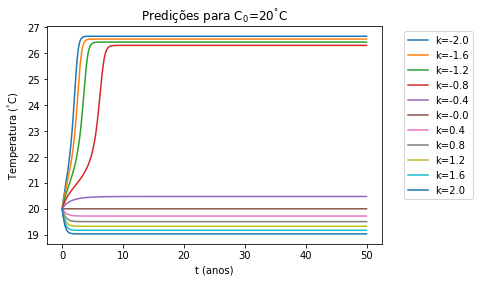

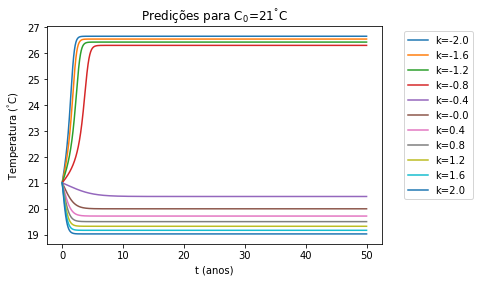

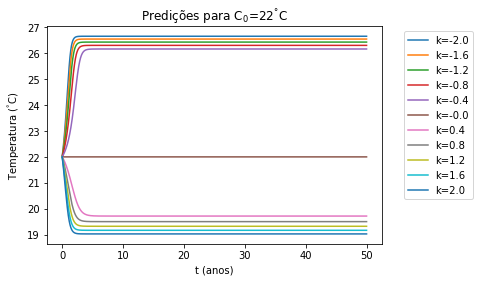

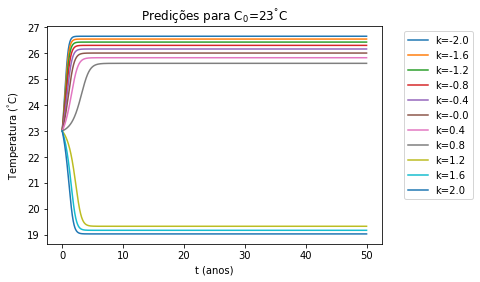

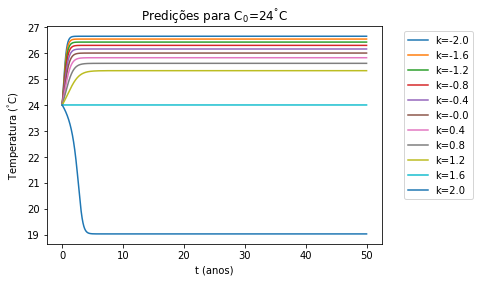

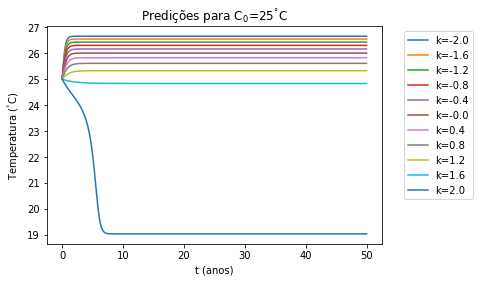

In [ ]:
# Módulo gerando uma rede para vários k e C0 
import predicao_temperatura_mod as pt
import numpy as np

t = np.arange(0, 50.01, 0.01) #Range temporal da função analisada (O intervalo superior do arrange é aberto)
temperatura_inicial = np.arange(19,26,1)
k = np.arange(-2,2.4,0.4)

pt.graficando_solucao_edo(temperatura_inicial,k,t)

A saída de streaming foi truncada nas últimas 5000 linhas.
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 20.0155 graus C para o valor de k -0.0 graus C^3 e leva um tempo 5.27 anos para atingi-lo
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 19.7318 graus C para o valor de k 0.4 graus C^3 e leva um tempo 3.93 anos para atingi-lo
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 19.5154 graus C para o valor de k 0.8 graus C^3 e leva um tempo 3.28 anos para atingi-lo
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 19.3349 graus C para o valor de k 1.2 graus C^3 e leva um tempo 2.9 anos para atingi-lo
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 19.1784 graus C para o valor de k 1.6 graus C^3 e leva um tempo 2.62 anos para atingi-lo
Para a temperatura inicial 21.450000000000383 graus C a temperatura final é 19.0386 graus C para o valor de k 2.0 gr

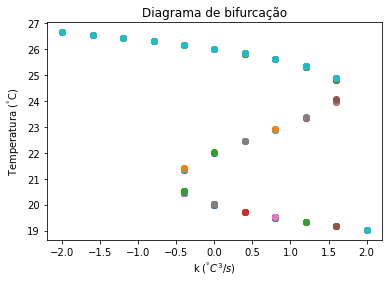

In [ ]:
# Cálculo da temperatura final com o tempo necessário para obtê-lá e gráfico de bifurcação
import predicao_temperatura_mod as pt
import numpy as np

t = np.arange(0, 50.01, 0.01) #Range temporal da função analisada (O intervalo superior do arrange é aberto)
temperatura_inicial = np.arange(19,26,0.01)
k = np.arange(-2,2.4,0.4)

pt.calculo_Tfinal(temperatura_inicial,t,k, resultado_tfinal = True) #O valor lógico é opcional e fica como falso por padrão

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22ºC$ ?  e se este valor flutuar em 0.1º para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21ºC$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?


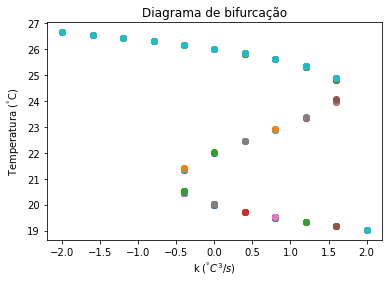

In [ ]:
# Pergunta 1 e 2

import predicao_temperatura_mod as pt
import numpy as np

t = np.arange(0, 50.01, 0.01) #Range temporal da função analisada (O intervalo superior do arrange é aberto)
temperatura_inicial = np.arange(19,26,0.01)
k = np.arange(-2,2.4,0.4)

pt.calculo_Tfinal(temperatura_inicial,t,k, resultado_tfinal = False) #O valor lógico é opcional e fica como falso por padrão

***(Pergunta 1 e 2)***

Pelo o diagrama de bifurcação acima, podemos ver que para certos valores k têm-se pontos biestáveis para valores de temperatura de equílibrio. Isto é, por exemplo em k=-0.5 temos valores de temperatura em torno de 22° C e 26° C para o mesmo k. Como k representa a regulamentação governamental de emissões de gases de efeito estufa, podemos interpretar que se k for mantido em -0.5, a temperatura poderá se reduzida de 26° C para 22° C ou vice-versa. De forma análoga aconteceria para k próximos de 1,5 mas teriamos uma redução de temperatura estabilização para temperatura do equador.

Disto isso, se observarmos k menores que -0.6 nunca teríamos uma redução da temperatura de estabilização para temperatura equatorial pois os únicos valores possíveis seriam em torno 26°C. Já para valores de k maiores que 1.8, obtém-se a redução de temperatura para temperatura de estabilização equatorial, ou seja, uma regulação extrema de gases estufas em torno de k=1.8 manteria a temperatura equatorial ao longo do tempo, fazendo k retorna à base k=0.  

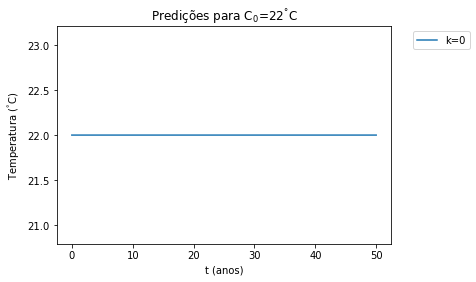

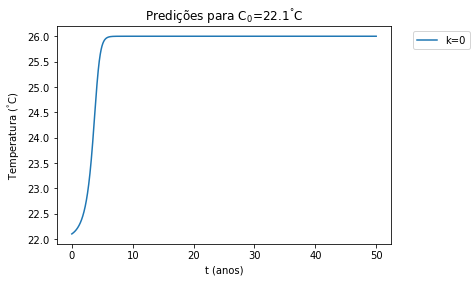

Para a temperatura inicial 22 graus C a temperatura final é 22 graus C para o valor de k 0 graus C^3 e leva um tempo 0.0 anos para atingi-lo
Para a temperatura inicial 22.1 graus C a temperatura final é 25.9927 graus C para o valor de k 0 graus C^3 e leva um tempo 6.35 anos para atingi-lo


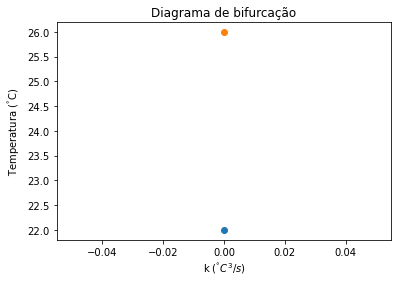

In [ ]:
# Pergunta 3

t = np.arange(0, 50.01, 0.01) #Range temporal da função analisada (O intervalo superior do arrange é aberto)
temperatura_inicial = [22 , 22.1]
k = [0]

pt.graficando_solucao_edo(temperatura_inicial,k,t)
pt.calculo_Tfinal(temperatura_inicial,t,k, resultado_tfinal = True) #O valor lógico é opcional e fica como falso por padrão

***(Pergunta 3)***

Se k for mantido ìgual à 0 com temperatura inicial 22°, a temperatura inicial será igual a temperatura de estabilização. Porém, se a temperatura inicial variar para 22,1° ocorrerá uma variação de temperatura de tal forma que a temperatura de estabilização será de aproximadamente 26°C levando um tempo de 6.35 anos para atingi-la.

In [1]:
#Pergunta 4
%%writefile predicao_temperatura_k_variavel.py
import matplotlib.pyplot as plt
import numpy as np

def funcao_temperatura(t,C,k):
    '''
    Função que abriga a EDO e a devolve para a função de integração numérica
    '''

    f = (1/10)*(C-20)*(22-C)*(C-26)-k 
    return f

def inte_numerica(temperatura_inicial,k,t,t_mud=5,k_variavel=False):
    '''
    Esta função resolve a EDO de primeira ordem numericamente com base no método de Runge-Kutta.
    Para isso, ela recebe a temperatura inicial C0 e o vetor com os valores de k, o vetor de tempo t, o valor do tempo de mudança do valor do k e do valor lógico de k_variável.
    Esta função em seu funcionamento invoca a funcao_temperatura(t,C[i],k) passando o tempo em analise, o valor calculado de temperatura os passando para um vetor e também passa o a da variável k como k_value.
    Essa função possui o argumento lógico adicional que possui default como False que é o k_variável. Deve ser setado como True caso o gráfico pretendido seja para um valor de temperatura inicial no qual o k mude ao decorrer dos anos.
    '''   
    listas_temperatura = {}
    for j in range(len(k)-1):
      C = []
      h = t[1]-t[0]
      C.append(temperatura_inicial) 
      for i in range(len(t)-1): 
        a1 = funcao_temperatura(t,C[i],k[j])
        a2 = funcao_temperatura(t+h/2,C[i]+(a1*h)/2,k[j])
        a3 = funcao_temperatura(t+h/2,C[i]+(a2*h)/2,k[j])
        a4 = funcao_temperatura(t+h,C[i]+a3*h,k[j])
        kn = (h/6)*(a1+2*a2+2*a3+a4)
        C.append(C[i]+kn)
        k_value = k[j] #para não colapsar minha lógica passando valor de a lista como antes
        if k_variavel == True:
          if t[i]==t_mud:
              print('A temperatura no instante de mudança do valor do k é de {} graus C'.format(C[i])) 
              k[j]=k[j+1]  
        listas_temperatura[k_value] = C
    return listas_temperatura 

def graficando_solucao_edo(temperatura_inicial,k,t,t_mud = 5,k_variavel= False):
    '''
    Com esta função os gráficos da solução da EDO são gerados para diferentes valores de k e diferentes temperaturas iniciais.
    Para isso ela recebe um vetor com os valores das temperaturas iniciais, o vetor com valores de k, o valor do tempo de mudança do valor do k e o vetor de tempo como argumento.
    Caso o valor lógico de k_varial seja True a legenda do valor de k não é exibida.
    '''
    for temp in temperatura_inicial: 
        listas_temperatura = inte_numerica(temp,k,t,t_mud,k_variavel)
        for k_value in k: 
            plt.plot(t,listas_temperatura[k_value], label='k={}'.format(round(k_value,2)))
        plt.title('Predições para C$_0$={}$^\degree$C'.format(temp))
        plt.xlabel("t (anos)")
        plt.ylabel("Temperatura ($^\degree$C)")
        if k_variavel == False:
           plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
        plt.show()

def graficando_diagrama_bifurcacao(t, lista_Tfinal, lista_k_do_Tfinal):
    '''
    Realiza gráfico do diagrama de bifurcação recebendo as variáveis contidas dentro da função calculo_Tfinal() como argumento. 
    '''
    for temp in lista_k_do_Tfinal:
        plt.scatter(lista_k_do_Tfinal[temp],lista_Tfinal[temp],cmap="rainbow",label='{} $\degree C$'.format(temp))
    plt.title('Diagrama de bifurcação')
    plt.xlabel("k ($^\degree C^3/s$)")
    plt.ylabel("Temperatura ($^\degree$C)")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
    plt.show() 

def calculo_Tfinal(temperatura_inicial,t, k, resultado_tfinal =False):
    '''
    Calcula Tfinal de cada solução da EDO e cria um vetor com este valor e o tempo que leva para chegar a esse valor assintótico, invocando a função graficando_diagrama_bifurcacao().
    Para utilizar essa função deve ser passado a ela o vetor com as temperaturas inicias, o vetor com valores de tempo, o vetor com os valores de k.
    Deve se ressaltar que há um argumento default que é para imprimir em tela o valor de Tfinal com o seu devido tempo para chegar ao valor assíntótico. SE nada for declarado nada será impresso em tela.
    Para imprimir os valore de Tfinal com o seu tempo associado adicionar o argumento adicional a função "resultado_tfinal = True".   
    '''
    lista_Tfinal = {}
    lista_k_do_Tfinal = {}
    lista_tempo_do_Tfinal = {}
    for temp in temperatura_inicial:
        listas_temperatura = inte_numerica(temp,k,t)
        Tfinal = []
        k_do_Tfinal = []
        tempo_do_Tfinal = []
        for k_value in listas_temperatura:  
            for i in range(len(t)-1):
                if (round(listas_temperatura[k_value][i+1],4)-round(listas_temperatura[k_value][i],4))==0: #A diferença entre as temperaturas nula da a Tfinal
                  Tfinal.append(listas_temperatura[k_value][i])
                  k_do_Tfinal.append(k_value)
                  tempo_do_Tfinal.append(t[i]) 
                  if resultado_tfinal ==  True:
                     print('Para a temperatura inicial {} graus C a temperatura final é {} graus C para o valor de k {} graus C^3 e leva um tempo {} anos para atingi-lo'.format(temp,round(listas_temperatura[k_value][i],2),round(k_value,2),round(t[i],2)))
                  break
        lista_Tfinal[temp] = Tfinal
        lista_k_do_Tfinal[temp] = k_do_Tfinal
        lista_tempo_do_Tfinal[temp] = tempo_do_Tfinal   
    graficando_diagrama_bifurcacao(t, lista_Tfinal, lista_k_do_Tfinal)   

Overwriting predicao_temperatura_k_variavel.py


A temperatura no instante de mudança do valor do k é de 21.0 graus C


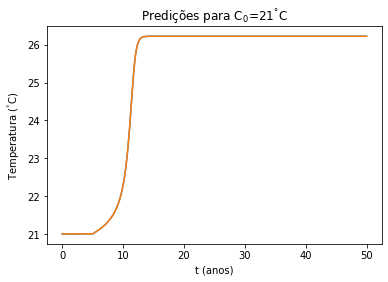

In [2]:
#Pergunta 4
import predicao_temperatura_k_variavel as ptkv
import numpy as np

t = np.arange(0, 50.01, 0.01) 
temperatura_inicial = [21] 
k = [-0.5,-0.6,]

ptkv.graficando_solucao_edo(temperatura_inicial,k,t,t_mud = 5,k_variavel= True)

***(Pergunta 4)***

***a)*** A temperatura do equador no instante de mudança dos k's é de 21°C

***b)*** 5 Anos após as mudanças no k, a tendência da temperatura de estabilização é subir atingindo um valor de aproximadamente 26°C.

***c)*** Manter o k mínimo com o valor de -0.6 manterá a temperatura estável em 50 anos.